Reid Norton
 - Quinn O'Connor
 - Collaborator 2
 - etc

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 2 - Classification

Due Friday Mar 28, 2025 4p

Total pts: 30

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - *Do not rewrite code* if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

In this problem, you'll be comparing Logistic Regression, Decision Trees, and Random Forests in a task identifying mushrooms as edible or poisonous.
The data is imported below and the features and feature values are listed. Notice, they're all letters.

 - Split the data into targets and features
 - Decide which features are ordinal or categorical. Refer to the feature descriptions on the [UCI Machine Learning site](https://archive.ics.uci.edu/dataset/73/mushroom) (hint: at least 3 categories are ordinal and others are binary...so you'll use an ordinal encoder)
 - Encode the features
 - Train the three models. You will want to use ```LogisticRegressionCV``` and ```GridSearchCV``` to find the best version of each model.
 - Make predictions with your models.
 - Show the confusion matrices for each type of model evaluated on the same test set. Label each figure clearly as to which model it is.

In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

mushrooms_df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/mushrooms.csv')

for k, col in enumerate(mushrooms_df.columns):
    print(f'{k:>3}. {col} - {mushrooms_df[col].unique()}')

  0. type - ['p' 'e']
  1. cap_shape - ['x' 'b' 's' 'f' 'k' 'c']
  2. cap_surface - ['s' 'y' 'f' 'g']
  3. cap_color - ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
  4. bruises - ['t' 'f']
  5. odor - ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
  6. gill_attachment - ['f' 'a']
  7. gill_spacing - ['c' 'w']
  8. gill_size - ['n' 'b']
  9. gill_color - ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
 10. stalk_shape - ['e' 't']
 11. stalk_root - ['e' 'c' 'b' 'r' '?']
 12. stalk_surface_above_ring - ['s' 'f' 'k' 'y']
 13. stalk_surface_below_ring - ['s' 'f' 'y' 'k']
 14. stalk_color_above_ring - ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
 15. stalk_color_below_ring - ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
 16. veil_type - ['p']
 17. veil_color - ['w' 'n' 'o' 'y']
 18. ring_number - ['o' 't' 'n']
 19. ring_type - ['p' 'e' 'l' 'f' 'n']
 20. spore_print_color - ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
 21. population - ['s' 'n' 'a' 'v' 'y' 'c']
 22. habitat - ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [13]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y = mushrooms_df['type']
X = mushrooms_df.drop('type', axis=1)

ord_features = ['ring_number', 'gill_spacing', 'population', 'gill_size']
categorical_features = [col for col in X.columns if col not in ord_features]

ordEnc = OrdinalEncoder(categories =[['o', 't', 'n'], ['c', 'w'], ['s', 'n', 'a', 'v', 'y', 'c'], ['n', 'b']], dtype = np.int8)
X_ord = ordEnc.fit_transform(X[ord_features])
one_hot_enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat = one_hot_enc.fit_transform(X[categorical_features])
X_processed = np.hstack((X_ord, X_cat))


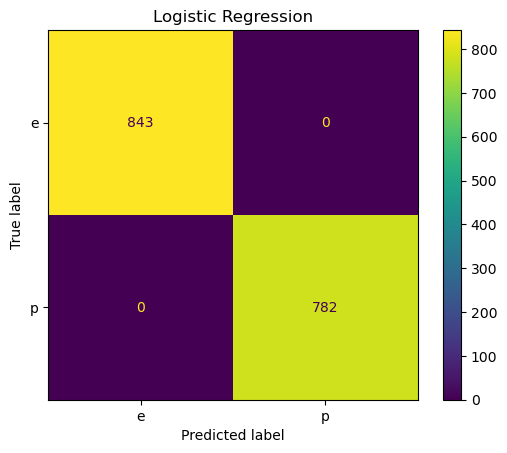

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

model_LogReg = LogisticRegressionCV(penalty = 'l2', max_iter = 1000)
model_LogReg.fit(X_train, y_train)

y_pred_log = model_LogReg.predict(X_test)
cm = confusion_matrix(y_test, y_pred_log, labels=np.unique(y))
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
cm_display.plot()
plt.title('Logistic Regression')
plt.show()

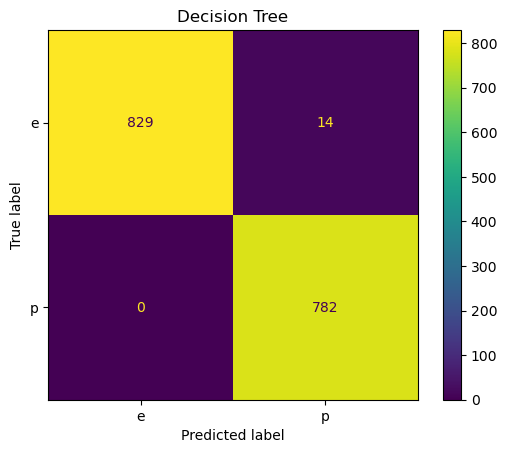

In [ ]:
decision_tree = GridSearchCV(DecisionTreeClassifier(), param_grid={'max_depth': [3, 4]}, cv=5)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=np.unique(y))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=np.unique(y))
disp.plot()
plt.title('Decision Tree')
plt.show()

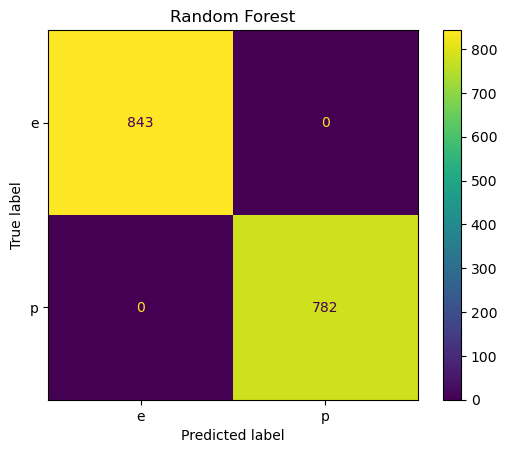

In [39]:
rf_model = GridSearchCV(RandomForestClassifier(), param_grid={'n_estimators': [10, 20, 100]}, cv=5)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=np.unique(y))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=np.unique(y))
disp.plot()
plt.title('Random Forest')
plt.show()


In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy_log = accuracy_score(y_test, y_pred_log)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f'Accuracy Logistic Regression: {accuracy_log:.2f}')
print(f'Accuracy Decision Tree: {accuracy_dt:.2f}')
print(f'Accuracy Random Forest: {accuracy_rf:.2f}')

precision_log = precision_score(y_test, y_pred_log, pos_label='e')
precision_dt = precision_score(y_test, y_pred_dt, pos_label='e')
precision_rf = precision_score(y_test, y_pred_rf, pos_label='e')

print(f'Precision Logistic Regression: {precision_log:.2f}')
print(f'Precision Decision Tree: {precision_dt:.2f}')
print(f'Precision Random Forest: {precision_rf:.2f}')   

recall_log = recall_score(y_test, y_pred_log, pos_label='e')
recall_dt = recall_score(y_test, y_pred_dt, pos_label='e')
recall_rf = recall_score(y_test, y_pred_rf, pos_label='e')

print(f'Recall Logistic Regression: {recall_log:.2f}')
print(f'Recall Decision Tree: {recall_dt:.2f}')
print(f'Recall Random Forest: {recall_rf:.2f}')

Accuracy Logistic Regression: 1.00
Accuracy Decision Tree: 0.99
Accuracy Random Forest: 1.00
Precision Logistic Regression: 1.00
Precision Decision Tree: 1.00
Precision Random Forest: 1.00
Recall Logistic Regression: 1.00
Recall Decision Tree: 0.98
Recall Random Forest: 1.00


### Problem 1 questions

 - Which model was best?
 - What were the hyper-parameters of this model.
 - What were the accuracy, recall, and precision of the model.
 - Of accuracy, recall, precision, which did you use to decide the best model.

#### Your responses here:

- Which model: 
    The logistic regression and the random forest were both perfect.
- Hyper-parameters:
    logistic regression: penalty, max iterations
    random forest: cv and param_grid
- Metrics
    - Accuracy: 1 for both
    - Recall: 1 for both 
    - Precision: 1 for both
- How did you decide best? 
    They were both perfect on the confusion matrix.

## Problem 2

The NFL draft is coming up at the end of April. This is when NFL teams get to select college players to join their team. The draft comprises seven rounds over three days (day 1: round 1, day 2: rounds 2 and 3, day 3: rounds 4, 5, 6, 7) with teams taking turns selecting players. Better players tend to go in earlier rounds.

In this problem, you will try to predict whether defensive players are drafted on Day 1, 2, or 3 based on their performance in the NFL combine (an assay of physical skills).

The data are imported below.

 - Create a target variable for day 1, day 2, day 3 based on the round drafted.
 - Create the most accurate predictor you can using any method or subset of the data you choose. *You may not use round as a feature!*
 - Show the confusion matrix for your model and list the accuracy of your model.

In [84]:
nfl_draft = pd.read_csv('https://raw.githubusercontent.com/eatai/datasets/refs/heads/main/nfl_defensive_draft.csv')

def categorize_draft_round(round_num):
    if round_num == 1:
        return 1
    elif round_num in [2, 3]:
        return 2
    else:
        return 3

nfl_draft["day_drafted"] = nfl_draft["round"].apply(categorize_draft_round)
nfl_draft = nfl_draft.dropna(subset=["forty", "shuttle", "broad_jump"])

X = nfl_draft.drop(['day_drafted'], axis=1)
y = nfl_draft["day_drafted"]



In [85]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

nfl_draft

,Unnamed: 0,round,season,name,age,position,college_conference,height,weight,forty,vertical,broad_jump,cone,shuttle,day_drafted
1,1,1,2003,Terence Newman,25.0,DB,Big Twelve Conference,5.833333,189.0,4.37,41.0,136.0,6.88,3.83,1
3,3,1,2003,Kevin Williams,23.0,DL,NaN,6.416667,304.0,4.81,30.0,112.0,7.66,5.04,1
5,5,1,2003,Marcus Trufant,22.0,DB,NaN,5.916667,199.0,4.38,39.0,127.0,6.87,4.32,1
9,9,1,2003,Jerome McDougle,24.0,DL,NaN,6.166667,264.0,4.67,34.0,117.0,7.28,4.58,1
13,13,1,2003,Andre Woolfolk,23.0,DB,NaN,6.083333,197.0,4.47,35.5,128.0,6.78,3.96,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2284,2771,6,2024,Ryan Watts,22.0,DB,Big Twelve Conference,6.250000,208.0,4.53,40.5,125.0,6.82,4.13,3
2285,2772,6,2024,Tyler Davis,23.0,DL,Atlantic Coast Conference,6.166667,301.0,5.02,28.5,108.0,NaN,5.00,3
2286,2773,6,2024,Zion Logue,23.0,DL,Southeastern Conference,6.500000,314.0,5.14,29.0,109.0,NaN,4.92,3
2287,2776,6,2024,Jaden Crumedy,24.0,DL,Southeastern Conference,6.333333,301.0,4.97,29.5,105.0,NaN,4.66,3


Accuracy: 0.5097613882863341


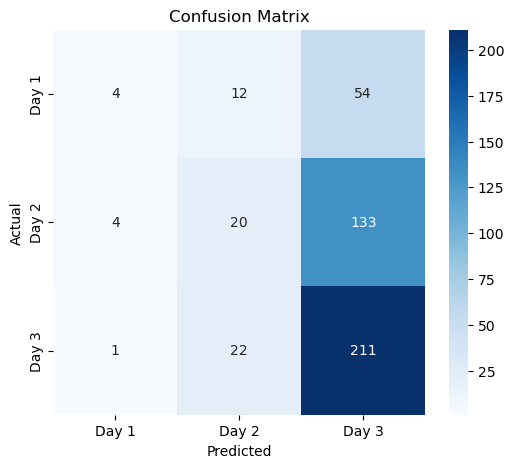

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

df = pd.read_csv("https://raw.githubusercontent.com/eatai/datasets/refs/heads/main/nfl_defensive_draft.csv")

def map_draft_day(round_num):
    if round_num == 1:
        return 1  # Day 1
    elif round_num in [2, 3]:
        return 2  # Day 2
    else:
        return 3  # Day 3

df['draft_day'] = df['round'].apply(map_draft_day)



X = df[['forty', 'vertical', 'broad_jump', 'cone', 'shuttle']]
y = df['draft_day']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


draft_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)
draft_model.fit(X_train, y_train)

y_pred_draft = draft_model.predict(X_test)


y_pred = draft_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)


plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Day 1", "Day 2", "Day 3"], yticklabels=["Day 1", "Day 2", "Day 3"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


### Problem 2 Questions

 - Which kind of model did you use and why did you choose it?
    I used a random forest classifier because it is a compilation of multiple decision trees, enhancing the accuracy of the model.
 - What was your accuracy?
    My accuracy was 50.9%

In [127]:
y_test

941     1
1298    2
1313    3
1270    1
464     2
       ..
1812    2
485     3
1161    1
736     2
861     2
Name: draft_day, Length: 461, dtype: int64

In [126]:
y_pred

array([3, 1, 3, 2, 1, 3, 3, 3, 3, 2, 1, 3, 3, 1, 3, 2, 3, 3, 3, 1, 3, 3,
       3, 3, 1, 1, 3, 2, 3, 3, 2, 3, 2, 3, 3, 2, 1, 1, 3, 3, 3, 3, 3, 1,
       1, 2, 3, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 2, 3,
       2, 1, 2, 3, 2, 1, 3, 3, 2, 3, 1, 1, 1, 3, 2, 1, 3, 2, 3, 2, 2, 3,
       1, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 1, 2, 3, 3, 2,
       2, 2, 3, 3, 1, 1, 3, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 1, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 2, 1, 3, 2, 1, 1, 2, 3, 3,
       3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 3, 1,
       2, 1, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 1, 2, 3, 3, 3, 3, 3, 3, 2, 1,
       3, 3, 2, 3, 2, 3, 3, 3, 3, 1, 2, 3, 1, 3, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 3, 2, 2, 2, 2, 1, 3, 3, 3, 2, 3, 1, 3, 2, 2, 3, 3, 3, 3, 3, 3,
       2, 2, 1, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 1, 2, 2, 3,
       3, 3, 1, 3, 2, 3, 1, 3, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 1,

In [ ]:
# Keep only the specified columns
df = df[['forty', 'vertical', 'broad_jump', 'cone', 'shuttle']]

# Display the first few rows of the updated dataset
print(df.head())